# 텐서 - 책 3장

In [ ]:
import torch
a = [1.0, 2.0, 3.0]

torch.ones(3)
torch.zeros(3)

[1.0, 2.0, 3.0]

In [ ]:
a = torch.zeros([2,5])
print(a)
print(a.shape)
print()

a = a[None] #길이가1인 차원을 추가함, unsqueeze
print(a)
print(a.shape)
print()

a = a[None] #길이가1인 차원을 추가함, unsqueeze
print(a)
print(a.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
torch.Size([1, 2, 5])


# 1. Regression

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/regression.csv")

x = data['x']
y = data['y']

x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y)

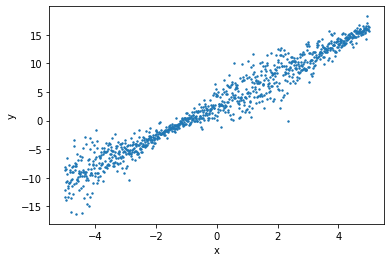

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(x.detach().numpy(), y.detach().numpy(), s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#####  ?? detach().numpy()
# ref. https://byeongjo-kim.tistory.com/32
# .detach() : 
  # "Returns a new Tensor, detached from the current graph. The result will never require gradient." 
  # 즉 graph에서 분리한 새로운 tensor를 리턴한다.
  # detach()는 이 연산 기록으로 부터 분리한 tensor을 반환

# .numpy() :
  # tensor를 numpy로 변환

In [ ]:
# w,b 모두 uniform(0,1) initializing 
#w 정의
w = torch.rand(1, dtype=float, requires_grad=True)

#b 정의
b = torch.rand(1, 1, dtype=float, requires_grad=True)

# # y=wx+b
# def func(w, b):
#   return ( x*w + b )

# loss function 정의
# loss_fn = nn.CrossEntropyLoss()

# optim method 정의
optim = torch.optim.SGD([w, b], lr=1e-4, momentum=0.9)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#####  #####  #####
EPOCH = 2000

tr_epoch = []
tr_loss = []
tr_w = []
tr_b = []

# optimization 과정
for epoch in range(EPOCH):
  # y=wx+b
  yhat = ( x*w + b )

  # loss function 정의
  loss = ((y - yhat)**2).mean()
  
  # 변화도를 0으로, 역전파 수행, 가중치 갱신
  optim.zero_grad()  # 모델 매개변수의 변화도를 재설정
  loss.backward() # 예측 손실(prediction loss)을 역전파, 각 매개변수에 대한 손실의 변화도를 저장
  optim.step()  # 수집된 변화도로 매개변수를 조정

  if epoch % 50 == 0 :
    print('epoch:{:03d}, w:{:.4f}, b:{:.4f}, loss:{:.4f} '.format(epoch, w.item(), b.item(), loss.item()))
    tr_epoch.append(epoch)
    tr_loss.append(loss.item())
    tr_w.append(w.item())
    tr_b.append(b.item())


### ?? zero_grad() 를 항상 backward() 전에 해야하는가
  # zero_grad() :  method는 optimizer에 연결된 parameter들의 gradient를 0으로 만든다.
  # "Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에,
  # 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야한다.
# optim.zero_grad() 
# loss.backward() 
# optim.step()


epoch:000, w:0.6176, b:0.2987, loss:44.3576 
epoch:050, w:1.7507, b:0.4935, loss:15.3416 
epoch:100, w:2.3492, b:0.7062, loss:7.8862 
epoch:150, w:2.5635, b:0.8984, loss:6.3209 
epoch:200, w:2.6393, b:1.0721, loss:5.6222 
epoch:250, w:2.6660, b:1.2289, loss:5.1245 
epoch:300, w:2.6755, b:1.3705, loss:4.7277 
epoch:350, w:2.6788, b:1.4984, loss:4.4052 
epoch:400, w:2.6800, b:1.6139, loss:4.1423 
epoch:450, w:2.6804, b:1.7181, loss:3.9280 
epoch:500, w:2.6805, b:1.8123, loss:3.7532 
epoch:550, w:2.6806, b:1.8974, loss:3.6106 
epoch:600, w:2.6806, b:1.9742, loss:3.4944 
epoch:650, w:2.6806, b:2.0435, loss:3.3996 
epoch:700, w:2.6806, b:2.1061, loss:3.3223 
epoch:750, w:2.6806, b:2.1627, loss:3.2592 
epoch:800, w:2.6806, b:2.2138, loss:3.2078 
epoch:850, w:2.6806, b:2.2599, loss:3.1659 
epoch:900, w:2.6806, b:2.3015, loss:3.1317 
epoch:950, w:2.6806, b:2.3391, loss:3.1038 
epoch:1000, w:2.6806, b:2.3731, loss:3.0811 
epoch:1050, w:2.6806, b:2.4038, loss:3.0625 
epoch:1100, w:2.6806, b:2.43

w :  2.680617046647237
b :  2.6482618335229353


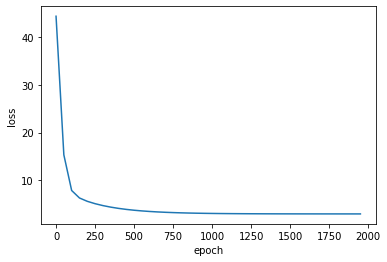

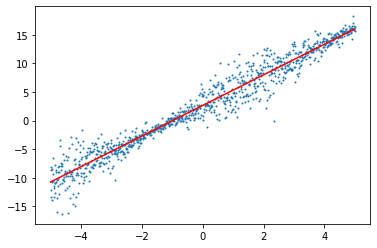

In [ ]:
# 최종 w,b 
print("w : ", w.item())
print("b : ", b.item())

plt.plot(tr_epoch, tr_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


plt.scatter(x.detach().numpy(), y.detach().numpy(), s=1)
plt.plot(x.detach().numpy(), yhat[-1].detach().numpy(), "r")
plt.show()

# 1. Regression - 같은 문제를 OLS로 풀기

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

# data = pd.read_csv("/content/regression.csv")
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/regression.csv")


x = data['x']
y = data['y']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### OLS
x_bar = x.mean()
y_bar = y.mean()
w = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
b = y_bar - w * x_bar

yhat = ( x*w + b )
loss = ((y - yhat)**2).mean()

# 최종 w,b 
print('w: {:.2f}, b: {:.2f}, loss: {:.6f}'.format(w, b, loss))

w: 2.68, b: 2.69, loss: 2.980555


In [ ]:
### ref. scikit-learn
x = data['x'].to_numpy()
y = data['y'].to_numpy()

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

print('w: {:.2f}, b: {:.2f}'.format(model.coef_[0], model.intercept_))

w: 2.68, b: 2.69


# 2. MNIST 홀짝 Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transfroms
from torch.autograd import Variable

In [ ]:
batch_size = 100

# MNIST 데이터셋 로드
train_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # 데이터를 0에서 255까지 있는 값을 0에서 1사이 값으로 변환
    ])
)
test_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = False,
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # 데이터를 0에서 255까지 있는 값을 0에서 1사이 값으로 변환
    ])
)
 
# train_loader, test_loader 생성
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
 

# input size를 알기 위해서
examples = enumerate(train_set)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

torch.Size([1, 28, 28])
torch.Size([100, 1, 28, 28])


<Figure size 432x288 with 0 Axes>

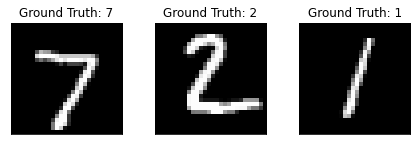

In [ ]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


In [ ]:
x = train_set[0][0]
y = train_set[0][1]
print(x.shape)
print(y)

torch.Size([1, 28, 28])
5


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

model = Net()
print(model)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
learning_rate = 0.001
epochs = 50

log_interval = 100

loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

train_acc = 0
for epoch in range(epochs) :
  for batch_idx, (data, y) in enumerate(train_loader):
    data = Variable(data.view(-1,28 * 28))
    y = Variable(y.view(-1))
    y = (y%2).float()
    
    optimizer.zero_grad()
    y_pred = model(data)
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    optimizer.step()

    # if batch_idx % (log_interval*50) == 0  : #  epoch % log_interval == 0 & 
    #   y_lb = (y_pred.data>0.5)*1
    #   train_acc = y_lb.eq(y.view_as(y_lb)).sum() / len(y_lb)
  
    #   print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAcc: {:.6f}'.format( epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item(), train_acc )) 
    #   train_losses.append(loss.item())
  
  y_lb = (y_pred.data>0.5)*1
  train_acc = y_lb.eq(y.view_as(y_lb)).sum() / len(y_lb)
  print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAcc: {:.6f}'.format( epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item(), train_acc )) 
  train_losses.append(loss.item())

  test_loss = 0
  correct = 0
  train_acc = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = Variable(data.view(-1,28 * 28))
      target = Variable(target.view(-1))
      target = (target%2).float()
      
      y_pred = model(data)
      y_lb = (y_pred.data>0.5)*1

      test_loss += loss_fn(y_pred.view_as(target), target)
      pred = y_pred.data.max(1, keepdim=True)[1]
      
      train_acc = y_lb.eq(target.view_as(y_lb)).sum() / len(y_lb)
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), (ACC:{:.6f})\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset), train_acc))


  # test_loss = 0
  # correct = 0
  # with torch.no_grad():
  #   for data, target in test_loader:
  #     data = Variable(data.view(-1,28 * 28))
  #     target = Variable(target.view(-1))
  #     target = (target%2).float()
      
  #     y_pred = model(data)
  #     test_loss += loss_fn(y_pred.view_as(target), target)
  #     pred = y_pred.data.max(1, keepdim=True)[1]
  #     correct += pred.eq(target.data.view_as(pred)).sum()
  # test_loss /= len(test_loader.dataset)
  # test_losses.append(test_loss)
  # print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))
  

Train Epoch: 0 [59900/60000 (100%)]	Loss: 0.541839	Acc: 0.830000
Test set: Avg. loss: 0.0054, Accuracy: 4926/10000 (49%), (ACC:0.790000)

Train Epoch: 1 [59900/60000 (100%)]	Loss: 0.478288	Acc: 0.830000
Test set: Avg. loss: 0.0047, Accuracy: 4926/10000 (49%), (ACC:0.780000)

Train Epoch: 2 [59900/60000 (100%)]	Loss: 0.441052	Acc: 0.830000
Test set: Avg. loss: 0.0044, Accuracy: 4926/10000 (49%), (ACC:0.770000)

Train Epoch: 3 [59900/60000 (100%)]	Loss: 0.416520	Acc: 0.840000
Test set: Avg. loss: 0.0042, Accuracy: 4926/10000 (49%), (ACC:0.760000)

Train Epoch: 4 [59900/60000 (100%)]	Loss: 0.399056	Acc: 0.840000
Test set: Avg. loss: 0.0040, Accuracy: 4926/10000 (49%), (ACC:0.750000)

Train Epoch: 5 [59900/60000 (100%)]	Loss: 0.385937	Acc: 0.840000
Test set: Avg. loss: 0.0039, Accuracy: 4926/10000 (49%), (ACC:0.750000)

Train Epoch: 6 [59900/60000 (100%)]	Loss: 0.375684	Acc: 0.840000
Test set: Avg. loss: 0.0038, Accuracy: 4926/10000 (49%), (ACC:0.750000)

Train Epoch: 7 [59900/60000 (100%)

In [ ]:
test_loss = 0
correct = 0
train_acc = 0
with torch.no_grad():
  for data, target in test_loader:
    data = Variable(data.view(-1,28 * 28))
    target = Variable(target.view(-1))
    target = (target%2).float()
    
    y_pred = model(data)
    y_lb = (y_pred.data>0.5)*1

    test_loss += loss_fn(y_pred.view_as(target), target)
    pred = y_pred.data.max(1, keepdim=True)[1]
    
    train_acc = y_lb.eq(target.view_as(y_lb)).sum() / len(y_lb)
    correct += pred.eq(target.data.view_as(pred)).sum()
test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), (ACC:{})\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset), train_acc))



Test set: Avg. loss: 0.0027, Accuracy: 4926/10000 (49%), (ACC:0.8299999833106995)



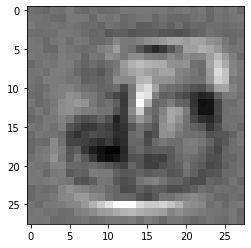

In [ ]:
fig = plt.figure()
plt.imshow(list(model.parameters())[0].reshape(28,28).detach().numpy(), cmap='gray')

In [ ]:
learning_rate = 0.001
epochs = 100

log_interval = 100

loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5, eta_min=0)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=-0.35, patience=5, threshold=1e-2)

train_losses = []
test_losses = []

train_acc = 0
for epoch in range(epochs) :
  for batch_idx, (data, y) in enumerate(train_loader):
    data = Variable(data.view(-1,28 * 28))
    y = Variable(y.view(-1))
    y = (y%2).float()
    
    optimizer.zero_grad()
    y_pred = model(data)
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    optimizer.step()

  # scheduler.step()
  y_lb = (y_pred.data>0.5)*1
  train_acc = y_lb.eq(y.view_as(y_lb)).sum() / len(y_lb)
  print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAcc: {:.6f}'.format( epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item(), train_acc )) 
  train_losses.append(loss.item())

  test_loss = 0
  correct = 0
  test_acc = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = Variable(data.view(-1,28 * 28))
      target = Variable(target.view(-1))
      target = (target%2).float()
      
      y_pred = model(data)
      y_lb = (y_pred.data>0.5)*1

      test_loss += loss_fn(y_pred.view_as(target), target)
      pred = y_pred.data.max(1, keepdim=True)[1]
      
      test_acc = y_lb.eq(target.view_as(y_lb)).sum() / len(y_lb)
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), (ACC:{:.6f})\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset), test_acc))

scheduler.step(test_acc)
 

Train Epoch: 0 [59900/60000 (100%)]	Loss: 0.564943	Acc: 0.800000
Test set: Avg. loss: 0.0055, Accuracy: 4926/10000 (49%), (ACC:0.750000)

Train Epoch: 1 [59900/60000 (100%)]	Loss: 0.494919	Acc: 0.820000
Test set: Avg. loss: 0.0048, Accuracy: 4926/10000 (49%), (ACC:0.760000)

Train Epoch: 2 [59900/60000 (100%)]	Loss: 0.454439	Acc: 0.830000
Test set: Avg. loss: 0.0044, Accuracy: 4926/10000 (49%), (ACC:0.750000)

Train Epoch: 3 [59900/60000 (100%)]	Loss: 0.427970	Acc: 0.840000
Test set: Avg. loss: 0.0042, Accuracy: 4926/10000 (49%), (ACC:0.760000)

Train Epoch: 4 [59900/60000 (100%)]	Loss: 0.409195	Acc: 0.840000
Test set: Avg. loss: 0.0040, Accuracy: 4926/10000 (49%), (ACC:0.740000)

Train Epoch: 5 [59900/60000 (100%)]	Loss: 0.395109	Acc: 0.840000
Test set: Avg. loss: 0.0039, Accuracy: 4926/10000 (49%), (ACC:0.740000)

Train Epoch: 6 [59900/60000 (100%)]	Loss: 0.384098	Acc: 0.840000
Test set: Avg. loss: 0.0038, Accuracy: 4926/10000 (49%), (ACC:0.740000)

Train Epoch: 7 [59900/60000 (100%)

# 3. MNIST+SOFTMAX, MNIST+NN, dropout, regularization, etc

1. MNIST + No hidden layer + 10 output layer(Softmax)
2. MNIST + N hidden layer + 10 output layer
    1. 리스트 형태로 숫자 받아서 히든 레이어 만들기
    ex) input : [128,64,32]

    Model : 784 - 128 - 64 - 32 - 10
    
    Activation function은 자유롭게 쓰고 싶은거 사용
3. 2.+ dropout layer
4. 2.+ kernal regularizarion
    1. L1, L2 두개 구현하기, weight decay 와 앞에 두개의 차이
5. 레이어 initialization 방법 적용하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transfroms
from torch.autograd import Variable

USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device ,"\n")

batch_size = 100

# MNIST 데이터셋 로드
train_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # 데이터를 0에서 255까지 있는 값을 0에서 1사이 값으로 변환
    ])
)
test_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = False,
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # 데이터를 0에서 255까지 있는 값을 0에서 1사이 값으로 변환
    ])
)
 
# train_loader, test_loader 생성
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
 

# input size를 알기 위해서
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("train_set (shape) : ", example_data.shape)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("test_loader (shape) : ",example_data.shape)

x = train_set[0][0]
y = train_set[0][1]
print("x.shape : ", x.shape)
print("y : ", y)

True
학습을 진행하는 기기: cuda:0 

train_set (shape) :  torch.Size([100, 1, 28, 28])
test_loader (shape) :  torch.Size([100, 1, 28, 28])
x.shape :  torch.Size([1, 28, 28])
y :  5


In [ ]:
class Net(nn.Module):
    def __init__(self,  layers_data: list, dr_rate = 0):
        super(Net, self).__init__()
        input_size = 28*28
        output_size = 10

        self.layers = nn.ModuleList()
        for size in layers_data:
            self.layers.append(nn.Linear(input_size, size))
            input_size = size  # For the next layer

            if dr_rate != 0  :
              self.layers.append(nn.Dropout(p=dr_rate))

        self.out = nn.Linear(input_size, output_size)
    
        if USE_CUDA:
            self.out = self.out.cuda()


    # def _init_weights(self, module):
    #     if isinstance(module, nn.Linear):
    #         module.weight.data.normal_(mean=0.0, std=1.0)
    #         if module.bias is not None:
    #             module.bias.data.zero_()


    def forward(self, x):
        x = x.view(-1, 784) # Flatten the data(n, 1, 28, 28) - > (n, 784)
        for layer in self.layers:
            # x = layer(x)
            x = F.relu(layer(x))
            
        output= F.softmax(self.out(x), dim=1)
        return output


print("<<<<< model1 >>>>>")
layers_data  = []
model = Net(layers_data).to(device)
print(model)

print("<<<<< model2 >>>>>")
layers_data  = [128,64,32]
model = Net(layers_data).to(device)
print(model)

print("<<<<< model3 >>>>>")
layers_data  = [128,64,32]
model = Net(layers_data, 0.2).to(device)
print(model)

<<<<< model1 >>>>>
Net(
  (layers): ModuleList()
  (out): Linear(in_features=784, out_features=10, bias=True)
)
<<<<< model2 >>>>>
Net(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (out): Linear(in_features=32, out_features=10, bias=True)
)
<<<<< model3 >>>>>
Net(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Dropout(p=0.2, inplace=False)
  )
  (out): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
def training(model, epochs=100, learning_rate=0.001, norm_v=-1, norm_c=0.3):
  norm = 0

  loss_fn = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  train_losses = []
  test_losses = []

  train_acc = 0
  for epoch in range(epochs) :
    for batch_idx, (data, y) in enumerate(train_loader):
      data, y = data.to(device), y.to(device)
      # data = Variable(data.view(-1,28 * 28))
      y = Variable(y.view(-1))
      
      optimizer.zero_grad()
      y_pred = model(data)       

      loss = loss_fn(y_pred, y)

      if norm_v == 1 :
        norm = sum(map(abs, torch.argmax(y_pred,dim=1)  - y))  / len(y)
      elif norm_v == 2 :
        norm = sum(pow( ( torch.argmax(y_pred,dim=1)  - y ) , 2) )  / len(y) 
        # regularity =  torch.norm(model.fc.weight, p=p)
      loss = loss + norm_c*norm
    
      loss.backward()
      optimizer.step()
    
    y_lb = torch.argmax(y_pred,dim=1)
    train_acc = y_lb.eq(y.view_as(y_lb)).sum() / len(y_lb)
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAcc: {:.6f}'.format( epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item(), train_acc )) 
    train_losses.append(loss.item())


    if epoch % 10 == 0 :
      test_loss = 0
      test_acc = 0
      with torch.no_grad():
        for data, y in test_loader:
          data, y = data.to(device), y.to(device)
          y = Variable(y.view(-1))
            
          y_pred = model(data)
          y_lb = torch.argmax(y_pred,dim=1)
          # pred = y_pred.data.max(1, keepdim=True)[1]

          test_loss += loss_fn(y_pred, y).float()
          test_acc += y_lb.eq(y.view_as(y_lb)).sum().float()
      test_loss /= len(test_loader.dataset)
      test_acc /= len(test_loader.dataset)
      print('Test set: Avg. Loss: {:.4f}, (ACC:{:.6f})\n'.format(test_loss, test_acc))

  return model, [train_acc.item(), train_losses[-1], test_acc.item(), test_loss.item()] 

In [ ]:
layers_data  = []
model1 = Net(layers_data)

layers_data  = [128,64,32]
model2 = Net(layers_data)

layers_data  = [128,64,32]
model3 = Net(layers_data, 0.2)

print("-------------------- Model1 --------------------")
md1, result1 = training(model1, epochs=100, learning_rate=0.005)

print("-------------------- Model2 --------------------")
md2, result2 = training(model2, epochs=100, learning_rate=0.005)

print("-------------------- Model3 --------------------")
md3, result3 = training(model3, epochs=100, learning_rate=0.005)

print("-------------------- Model4 --------------------")
layers_data  = [128,64,32]
model3 = Net(layers_data, 0.2)
md4, result4 = training(model3, epochs=100, learning_rate=0.005, norm_v=1, norm_c=0.2)

print("-------------------- Model5 --------------------")
layers_data  = [128,64,32]
model3 = Net(layers_data, 0.2)
md5, result5 = training(model3, epochs=100, learning_rate=0.005, norm_v=2, norm_c=0.2)


print("-------------------- Result --------------------")
print( "model1 : TrAcc:{:.5f} TestAcc:{:.5f}, TrLoss{:.5f} TestLoss{:.5f} ".format(result1[0],result1[2], result1[1],result1[3] ) )
print( "model2 : TrAcc:{:.5f} TestAcc:{:.5f}, TrLoss{:.5f} TestLoss{:.5f} ".format(result2[0],result2[2], result2[1],result2[3] ) )
print( "model3 : TrAcc:{:.5f} TestAcc:{:.5f}, TrLoss{:.5f} TestLoss{:.5f} ".format(result3[0],result3[2], result3[1],result3[3] ) )
print( "model4 : TrAcc:{:.5f} TestAcc:{:.5f}, TrLoss{:.5f} TestLoss{:.5f} ".format(result4[0],result4[2], result4[1],result4[3] ) )
print( "model5 : TrAcc:{:.5f} TestAcc:{:.5f}, TrLoss{:.5f} TestLoss{:.5f} ".format(result5[0],result5[2], result5[1],result5[3] ) )

-------------------- Model1 --------------------


In [ ]:
# epochs=100, learning_rate=0.001
# -------------------- Result --------------------
# model1 : TrAcc:0.51900 TestAcc:0.51250, TrLoss2.16309 TestLoss0.00217 
# model2 : TrAcc:0.15800 TestAcc:0.17150, TrLoss2.29884 TestLoss0.00230 
# model3 : TrAcc:0.19600 TestAcc:0.17470, TrLoss2.29824 TestLoss0.00230 
# model4 : TrAcc:0.25800 TestAcc:0.24920, TrLoss3.03882 TestLoss0.00230 
# model5 : TrAcc:0.16200 TestAcc:0.13340, TrLoss5.56107 TestLoss0.00230 


# epochs=200, learning_rate=0.003
# -------------------- Result --------------------
# model1 : TrAcc:0.83500 TestAcc:0.78780, TrLoss1.73969 TestLoss0.00179 
# model2 : TrAcc:0.47500 TestAcc:0.44470, TrLoss2.03771 TestLoss0.00205 
# model3 : TrAcc:0.35900 TestAcc:0.35720, TrLoss2.14618 TestLoss0.00214 
# model4 : TrAcc:0.48400 TestAcc:0.44800, TrLoss2.65976 TestLoss0.00207 
# model5 : TrAcc:0.44000 TestAcc:0.40960, TrLoss5.73952 TestLoss0.00219 

# epochs=300, learning_rate=0.005, norm_c=0.2


In [ ]:
import torch.nn.init as init

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [ ]:
model3.apply(init_weights)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Net(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Dropout(p=0.2, inplace=False)
  )
  (out): Linear(in_features=32, out_features=10, bias=True)
)

# 새 섹션

# EX) 참고 예제  (1)

In [ ]:
### ref1. https://yong0810.tistory.com/17

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transfroms
 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
print(device + " is available")
 
learning_rate = 0.001
batch_size = 100
num_classes = 10
epochs = 5
 
# MNIST 데이터셋 로드
train_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # 데이터를 0에서 255까지 있는 값을 0에서 1사이 값으로 변환
    ])
)
test_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = False,
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # 데이터를 0에서 255까지 있는 값을 0에서 1사이 값으로 변환
    ])
)
 
# train_loader, test_loader 생성
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
 
# input size를 알기 위해서
examples = enumerate(train_set)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape


cpu is available


torch.Size([1, 28, 28])

In [ ]:
class ConvNet(nn.Module):
  def __init__(self): # layer 정의
        super(ConvNet, self).__init__()

        # input size = 28x28 
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # input channel = 1, filter = 10, kernel size = 5, zero padding = 0, stribe = 1
        # ((W-K+2P)/S)+1 공식으로 인해 ((28-5+0)/1)+1=24 -> 24x24로 변환
        # maxpooling하면 12x12
  
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) # input channel = 1, filter = 10, kernel size = 5, zero padding = 0, stribe = 1
        # ((12-5+0)/1)+1=8 -> 8x8로 변환
        # maxpooling하면 4x4

        self.drop2D = nn.Dropout2d(p=0.25, inplace=False) # 랜덤하게 뉴런을 종료해서 학습을 방해해 학습이 학습용 데이터에 치우치는 현상을 막기 위해 사용
        self.mp = nn.MaxPool2d(2)  # 오버피팅을 방지하고, 연산에 들어가는 자원을 줄이기 위해 maxpolling
        self.fc1 = nn.Linear(320,100) # 4x4x20 vector로 flat한 것을 100개의 출력으로 변경
        self.fc2 = nn.Linear(100,10) # 100개의 출력을 10개의 출력으로 변경

  def forward(self, x):
        x = F.relu(self.mp(self.conv1(x))) # convolution layer 1번에 relu를 씌우고 maxpool, 결과값은 12x12x10
        x = F.relu(self.mp(self.conv2(x))) # convolution layer 2번에 relu를 씌우고 maxpool, 결과값은 4x4x20
        x = self.drop2D(x)
        x = x.view(x.size(0), -1) # flat
        x = self.fc1(x) # fc1 레이어에 삽입
        x = self.fc2(x) # fc2 레이어에 삽입
        return F.log_softmax(x) # fully-connected layer에 넣고 logsoftmax 적용
 
model = ConvNet().to(device) # CNN instance 생성
# Cost Function과 Optimizer 선택
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(epochs): # epochs수만큼 반복
    avg_cost = 0

    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad() # 모든 model의 gradient 값을 0으로 설정
        hypothesis = model(data) # 모델을 forward pass해 결과값 저장 
        cost = criterion(hypothesis, target) # output과 target의 loss 계산
        cost.backward() # backward 함수를 호출해 gradient 계산
        optimizer.step() # 모델의 학습 파라미터 갱신
        avg_cost += cost / len(train_loader) # loss 값을 변수에 누적하고 train_loader의 개수로 나눔 = 평균
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
 
# test
model.eval() # evaluate mode로 전환 dropout 이나 batch_normalization 해제 
with torch.no_grad(): # grad 해제 
    correct = 0
    total = 0

    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        out = model(data)
        preds = torch.max(out.data, 1)[1] # 출력이 분류 각각에 대한 값으로 나타나기 때문에, 가장 높은 값을 갖는 인덱스를 추출
        total += len(target) # 전체 클래스 개수 
        correct += (preds==target).sum().item() # 예측값과 실제값이 같은지 비교
        
    print('Test Accuracy: ', 100.*correct/total, '%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch:    1] cost = 0.31739229
[Epoch:    2] cost = 0.114715569
[Epoch:    3] cost = 0.0867257565
[Epoch:    4] cost = 0.0752806887
